In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import pytz
from IPython.display import VimeoVideo
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import seaborn as sns

In [2]:
df=pd.read_csv("C:\Jahir\TMLC MGP Aug 2023\P3\yield.csv")

In [3]:
df.head(5)

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [4]:
df.drop(columns="Row#",inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             777 non-null    float64
 1   honeybee              777 non-null    float64
 2   bumbles               777 non-null    float64
 3   andrena               777 non-null    float64
 4   osmia                 777 non-null    float64
 5   MaxOfUpperTRange      777 non-null    float64
 6   MinOfUpperTRange      777 non-null    float64
 7   AverageOfUpperTRange  777 non-null    float64
 8   MaxOfLowerTRange      777 non-null    float64
 9   MinOfLowerTRange      777 non-null    float64
 10  AverageOfLowerTRange  777 non-null    float64
 11  RainingDays           777 non-null    float64
 12  AverageRainingDays    777 non-null    float64
 13  fruitset              777 non-null    float64
 14  fruitmass             777 non-null    float64
 15  seeds                 7

In [6]:
df.isnull().sum()

clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [7]:
df.describe()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


In [8]:
corr = df.corr()

In [9]:
corr

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
clonesize,1.000000,0.119745,0.004807,-0.008451,-0.139049,0.034157,0.032854,0.033752,0.034295,0.033768,0.033566,-0.021696,-0.024455,-0.556591,-0.474038,-0.496156,-0.516737
honeybee,0.119745,1.000000,-0.233954,-0.125913,-0.189058,0.026359,0.025467,0.026365,0.026477,0.026104,0.025647,-0.073818,-0.093477,-0.009406,-0.166419,-0.170808,-0.044250
bumbles,0.004807,-0.233954,1.000000,0.010758,0.293665,-0.022863,-0.005801,-0.015821,-0.024662,-0.016801,-0.013985,0.058063,0.075376,0.289890,0.358202,0.380206,0.309407
andrena,-0.008451,-0.125913,0.010758,1.000000,0.387379,-0.026497,-0.023887,-0.025578,-0.026775,-0.025623,-0.025115,0.035297,0.043739,0.102549,0.092470,0.089178,0.140277
osmia,-0.139049,-0.189058,0.293665,0.387379,1.000000,-0.063755,-0.043237,-0.055441,-0.065910,-0.056546,-0.053141,0.083667,0.104188,0.334178,0.336136,0.353116,0.380892
MaxOfUpperTRange,0.034157,0.026359,-0.022863,-0.026497,-0.063755,1.000000,0.990961,0.998314,0.999900,0.998842,0.997658,-0.003286,-0.005677,-0.130450,0.058492,-0.034486,-0.187075
MinOfUpperTRange,0.032854,0.025467,-0.005801,-0.023887,-0.043237,0.990961,1.000000,0.997056,0.988988,0.996267,0.997798,-0.000798,-0.001889,-0.119856,0.067671,-0.024240,-0.175883
AverageOfUpperTRange,0.033752,0.026365,-0.015821,-0.025578,-0.055441,0.998314,0.997056,1.000000,0.997413,0.999944,0.999923,-0.002325,-0.004195,-0.125082,0.064034,-0.028925,-0.181774
MaxOfLowerTRange,0.034295,0.026477,-0.024662,-0.026775,-0.065910,0.999900,0.988988,0.997413,1.000000,0.998071,0.996609,-0.003558,-0.006087,-0.130693,0.058487,-0.034674,-0.187439
MinOfLowerTRange,0.033768,0.026104,-0.016801,-0.025623,-0.056546,0.998842,0.996267,0.999944,0.998071,1.000000,0.999787,-0.002403,-0.004334,-0.126788,0.062093,-0.030727,-0.183339


In [10]:
df.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

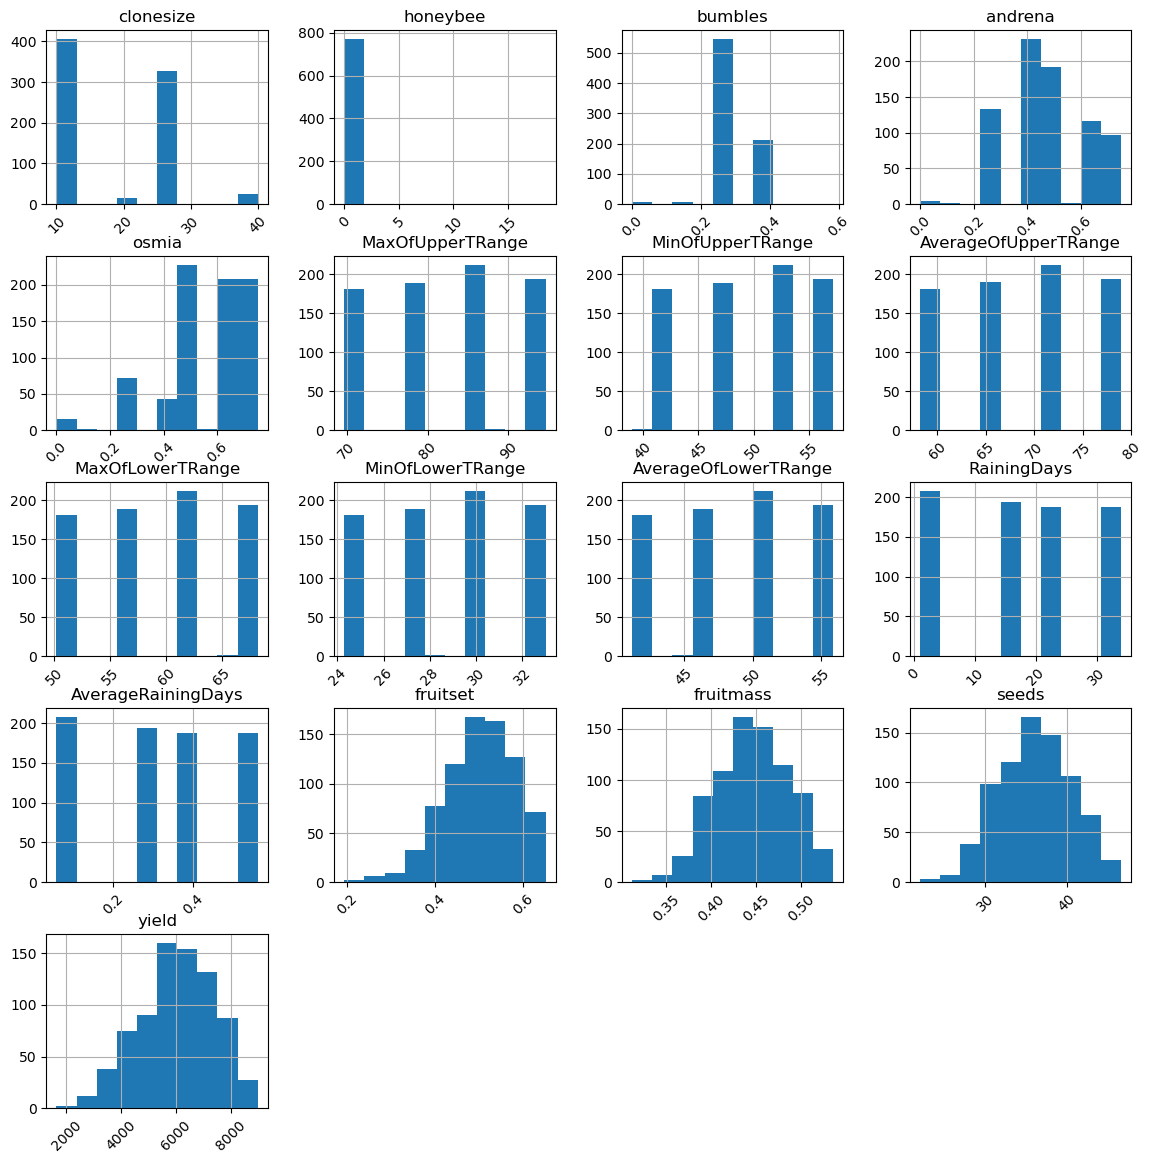

In [11]:
df.hist(figsize=(14,14), xrot=45)
plt.show()

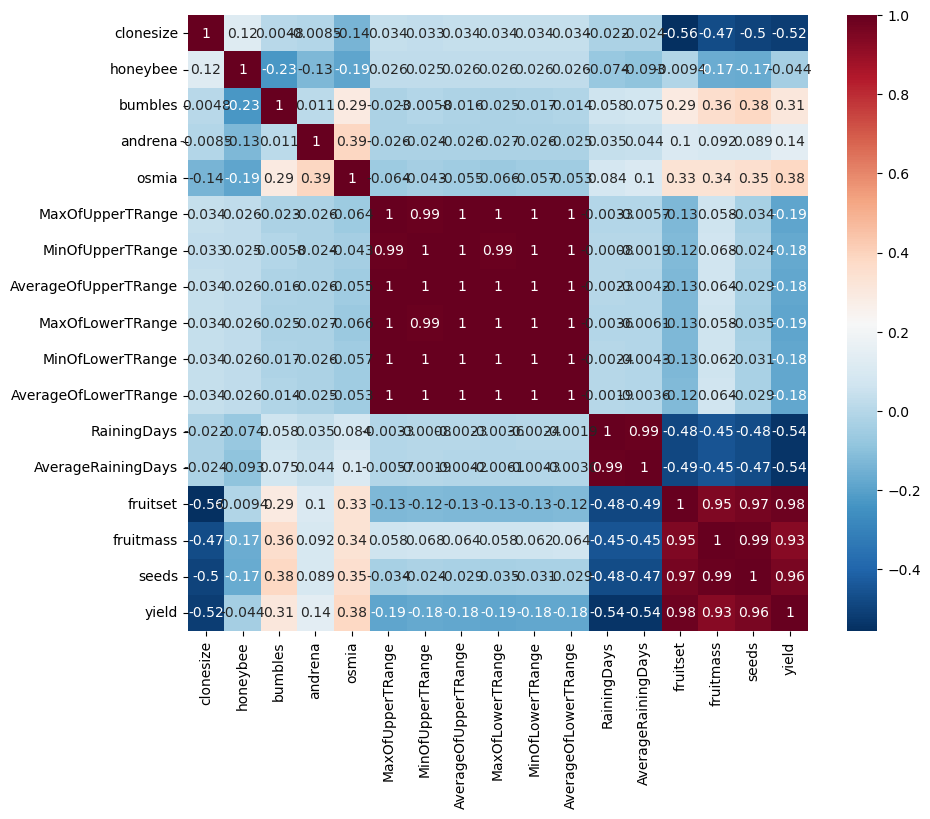

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='RdBu_r', annot=True)
plt.show()

In [13]:
#dropping multicollinearity features

df.drop(columns=["RainingDays", "fruitmass", "seeds", "MaxOfUpperTRange", "MinOfUpperTRange", "MaxOfLowerTRange","MinOfLowerTRange"],inplace=True)

In [14]:
corr = df.corr()

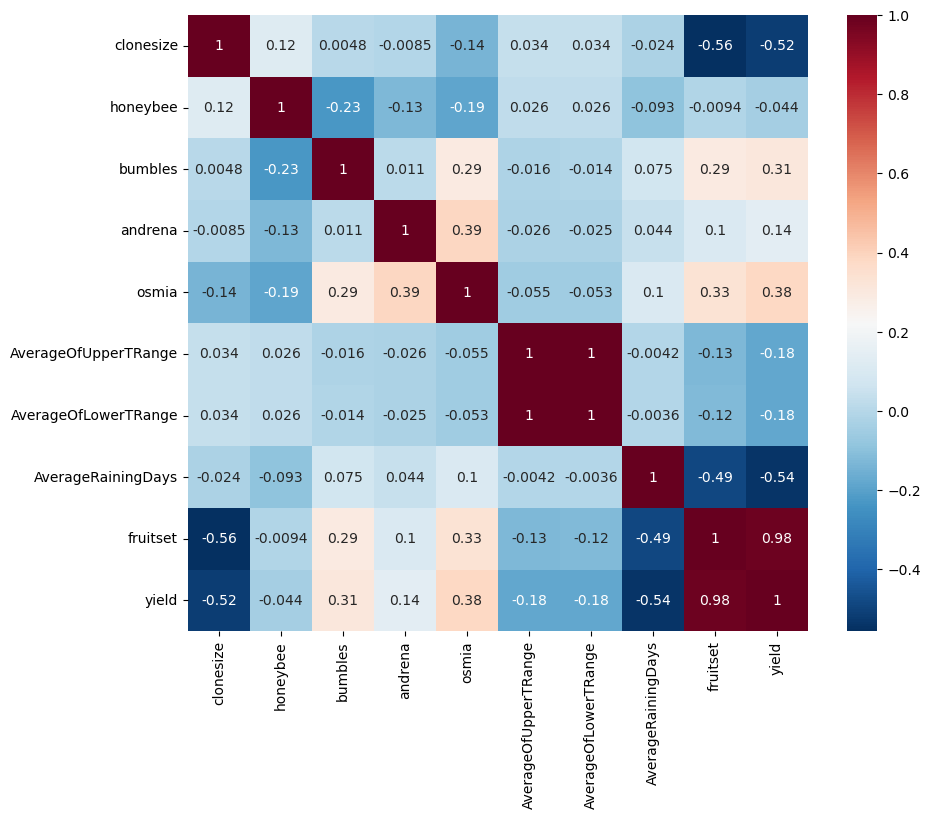

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='RdBu_r', annot=True)
plt.show()

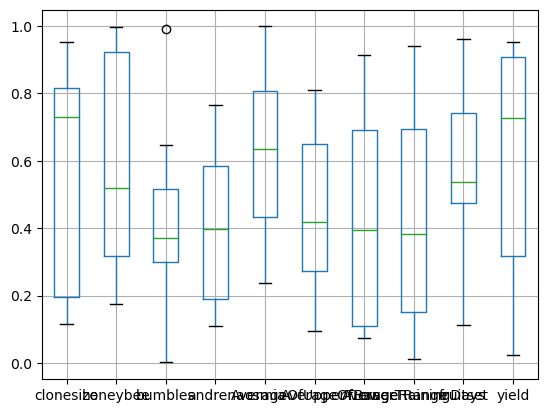

In [16]:
import numpy as np; 
import pandas as pd
import matplotlib.pyplot as plt
data = np.random.random(size=(10,10))
df1 = pd.DataFrame(data, columns = ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'AverageOfUpperTRange',
       'AverageOfLowerTRange',
       'AverageRainingDays', 'fruitset',
       'yield'])

df1.boxplot()
plt.show()

In [17]:
df.shape

(777, 10)

Text(0.5, 1.0, 'yield vs clonesize')

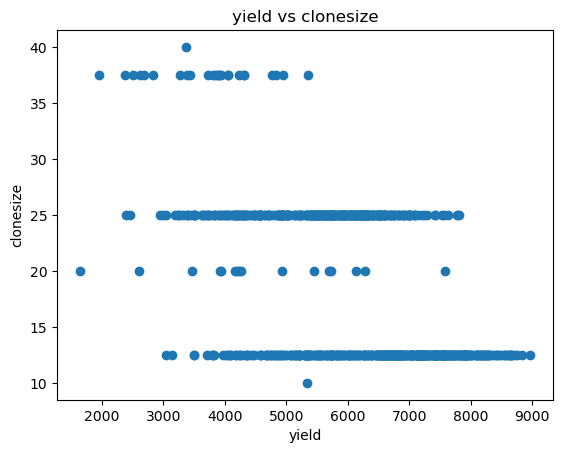

In [18]:
plt.scatter(df["yield"], df["clonesize"])


# Label axes
plt.xlabel("yield")
plt.ylabel("clonesize")
plt.title("yield vs clonesize")

Text(0.5, 1.0, 'yield vs honeybee')

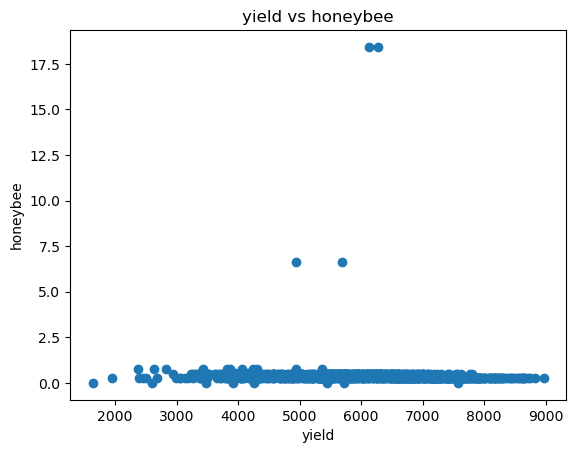

In [19]:
plt.scatter(df["yield"], df["honeybee"])


# Label axes
plt.xlabel("yield")
plt.ylabel("honeybee")
plt.title("yield vs honeybee")

Text(0.5, 1.0, 'yield vs bumbles')

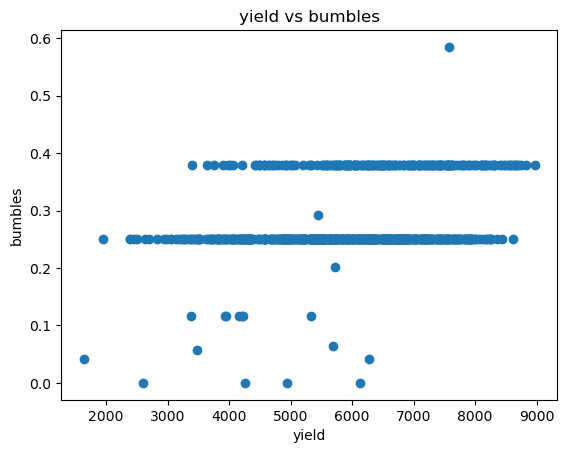

In [20]:
plt.scatter(df["yield"], df["bumbles"])


# Label axes
plt.xlabel("yield")
plt.ylabel("bumbles")
plt.title("yield vs bumbles")

Text(0.5, 1.0, 'yield vs andrena')

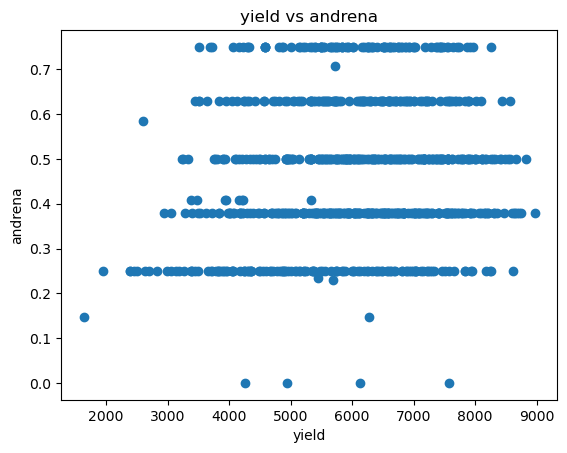

In [21]:
plt.scatter(df["yield"], df["andrena"])


# Label axes
plt.xlabel("yield")
plt.ylabel("andrena")
plt.title("yield vs andrena")

Text(0.5, 1.0, 'yield vs osmia')

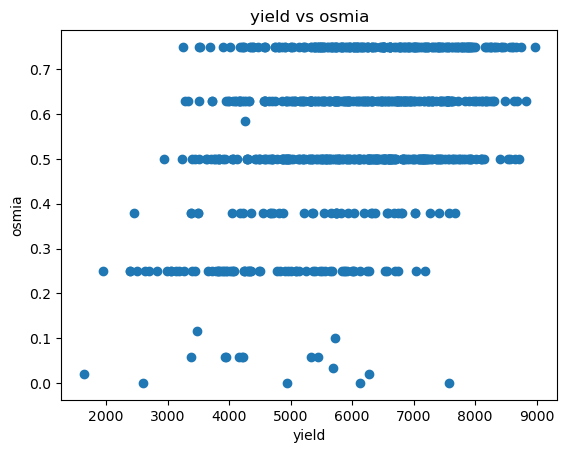

In [22]:
plt.scatter(df["yield"], df["osmia"])


# Label axes
plt.xlabel("yield")
plt.ylabel("osmia")
plt.title("yield vs osmia")

Text(0.5, 1.0, 'yield vs fruitset')

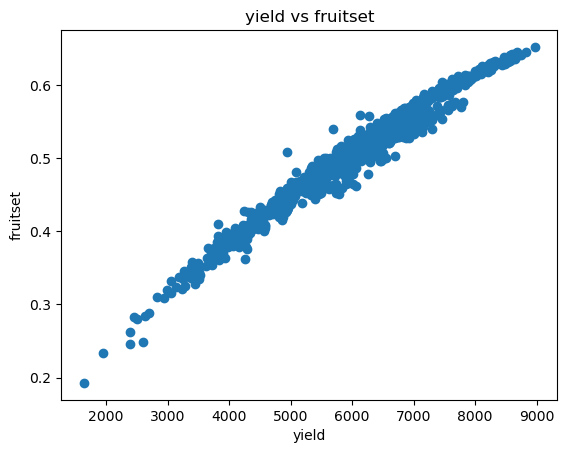

In [23]:
plt.scatter(df["yield"], df["fruitset"])


# Label axes
plt.xlabel("yield")
plt.ylabel("fruitset")
plt.title("yield vs fruitset")

Text(0.5, 1.0, 'yield vs AverageRainingDays')

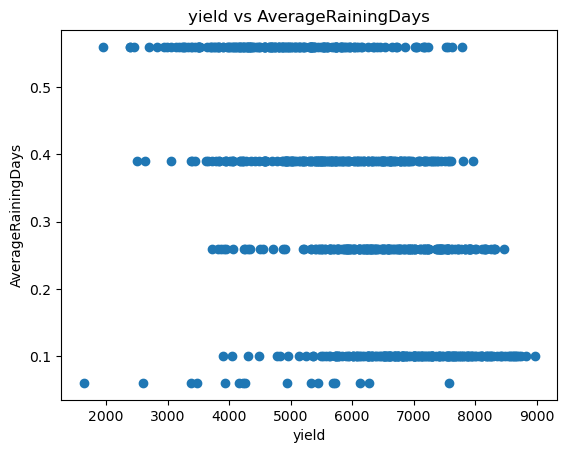

In [24]:
plt.scatter(df["yield"], df["AverageRainingDays"])


# Label axes
plt.xlabel("yield")
plt.ylabel("AverageRainingDays")
plt.title("yield vs AverageRainingDays")

In [25]:
target = "yield"
features = ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'AverageOfUpperTRange',
       'AverageOfLowerTRange',
       'AverageRainingDays', 'fruitset']

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Generate some sample data

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
pip install --upgrade scikit-learn

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\iamja\\anaconda3\\Lib\\site-packages\\~klearn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0


In [28]:
#baseline model

y_mean=y_train.mean()
y_pred_baseline = [y_mean]* len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean yield", round(y_train.mean(), 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean yield 6049.0
Baseline MAE: 1094.56


In [29]:
#Linear Regression

model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [30]:
import math

In [31]:
training_mae = mean_absolute_error(y_train, model1.predict(X_train))
test_mae = mean_absolute_error(y_test, model1.predict(X_test))
test_mse = mean_squared_error(y_test, model1.predict(X_test))
test_r2 = r2_score(y_test, model1.predict(X_test))
print("LR Training MAE:", round(training_mae, 2))
print("LR Test MAE:", round(test_mae, 2))
print("LR Test MSE:", round(test_mse, 2))
print("LR Test R2:", round(test_r2, 2))
print("LR Test RMSE:", round(math.sqrt(test_mse), 2))

LR Training MAE: 117.19
LR Test MAE: 121.2
LR Test MSE: 25599.5
LR Test R2: 0.99
LR Test RMSE: 160.0


In [32]:
#Decsision tree regressor

model2 = DecisionTreeRegressor()
model2.fit(X_train,y_train)

DecisionTreeRegressor()

In [33]:
training_mae = mean_absolute_error(y_train, model2.predict(X_train))
test_mae = mean_absolute_error(y_test, model2.predict(X_test))
test_mse = mean_squared_error(y_test, model2.predict(X_test))
test_r2 = r2_score(y_test, model2.predict(X_test))
print("LR Training MAE:", round(training_mae, 2))
print("LR Test MAE:", round(test_mae, 2))
print("LR Test MSE:", round(test_mse, 2))
print("LR Test R2:", round(test_r2, 2))
print("LR Test RMSE:", round(math.sqrt(test_mse), 2))

LR Training MAE: 0.0
LR Test MAE: 153.13
LR Test MSE: 40762.76
LR Test R2: 0.98
LR Test RMSE: 201.9


In [34]:
#Random forest

model3 = RandomForestRegressor()
model3.fit(X_train,y_train)

RandomForestRegressor()

In [35]:
training_mae = mean_absolute_error(y_train, model3.predict(X_train))
test_mae = mean_absolute_error(y_test, model3.predict(X_test))
test_mse = mean_squared_error(y_test, model3.predict(X_test))
test_r2 = r2_score(y_test, model3.predict(X_test))
print("LR Training MAE:", round(training_mae, 2))
print("LR Test MAE:", round(test_mae, 2))
print("LR Test MSE:", round(test_mse, 2))
print("LR Test R2:", round(test_r2, 2))
print("LR Test RMSE:", round(math.sqrt(test_mse), 2))

LR Training MAE: 42.6
LR Test MAE: 109.04
LR Test MSE: 23360.62
LR Test R2: 0.99
LR Test RMSE: 152.84


In [36]:
#Ridge
from sklearn.linear_model import Ridge
model4 = Ridge()
model4.fit(X_train,y_train)

Ridge()

In [37]:
training_mae = mean_absolute_error(y_train, model4.predict(X_train))
test_mae = mean_absolute_error(y_test, model4.predict(X_test))
test_mse = mean_squared_error(y_test, model4.predict(X_test))
test_r2 = r2_score(y_test, model4.predict(X_test))
print("LR Training MAE:", round(training_mae, 2))
print("LR Test MAE:", round(test_mae, 2))
print("LR Test MSE:", round(test_mse, 2))
print("LR Test R2:", round(test_r2, 2))
print("LR Test RMSE:", round(math.sqrt(test_mse), 2))

LR Training MAE: 248.97
LR Test MAE: 253.49
LR Test MSE: 93492.04
LR Test R2: 0.95
LR Test RMSE: 305.76


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a list of models
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree Regressor", DecisionTreeRegressor()),
    ("Random Forest Regressor", RandomForestRegressor())
]

# Train and evaluate each model
for name, model in models:
    model.fit(X_train, y_train)
    
    training_mae = mean_absolute_error(y_train, model.predict(X_train))
    test_mae = mean_absolute_error(y_test, model.predict(X_test))
    test_mse = mean_squared_error(y_test, model.predict(X_test))
    test_r2 = r2_score(y_test, model.predict(X_test))
    
    print(f"Model: {name}")
    print(f"Training MAE: {round(training_mae, 2)}")
    print(f"Test MAE: {round(test_mae, 2)}")
    print(f"Test MSE: {round(test_mse, 2)}")
    print(f"Test R2: {round(test_r2, 2)}")
    print(f"Test RMSE: {round(math.sqrt(test_mse), 2)}")
    print()
    
 


Model: Linear Regression
Training MAE: 117.19
Test MAE: 121.2
Test MSE: 25599.5
Test R2: 0.99
Test RMSE: 160.0

Model: Decision Tree Regressor
Training MAE: 0.0
Test MAE: 152.05
Test MSE: 39999.76
Test R2: 0.98
Test RMSE: 200.0

Model: Random Forest Regressor
Training MAE: 42.77
Test MAE: 110.66
Test MSE: 23017.23
Test R2: 0.99
Test RMSE: 151.71



In [39]:
X.shape

(777, 9)

In [40]:
#Hyperparameter tuning

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [41]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

from sklearn.model_selection import train_test_split, GridSearchCV

In [42]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [43]:
# Define a custom scoring function for RMSE (lower is better)
def rmse_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    return rmse  # Return the negative RMSE for minimization

In [44]:
gkf = KFold(n_splits=10, shuffle=True, random_state=42).split(X=X_train, y=y_train)

# A parameter grid for rf
params = {
    'n_estimators': range(100, 500, 100),  # [100,200,300,400,500]
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2,3,5]
}

rf_estimator = RandomForestRegressor()

gsearch = GridSearchCV(
    estimator= rf_estimator,
    param_grid= params,
    scoring=rmse_scorer,
    n_jobs=-1,
    cv=gkf,
    verbose=1,
)


rf_model = gsearch.fit(X=X_train, y=y_train)
(gsearch.best_params_, gsearch.best_score_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


({'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 100},
 156.7838876397063)

In [45]:
rf_tuned = RandomForestRegressor(ccp_alpha = 0.0,
                                min_samples_split = 2,
                                max_depth = 15,
                                n_estimators = 400)

rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=400)

In [46]:
print(rf_tuned.feature_importances_)

[0.00131201 0.00157248 0.00159406 0.00242755 0.00318972 0.0031917
 0.00290353 0.0034049  0.98040406]


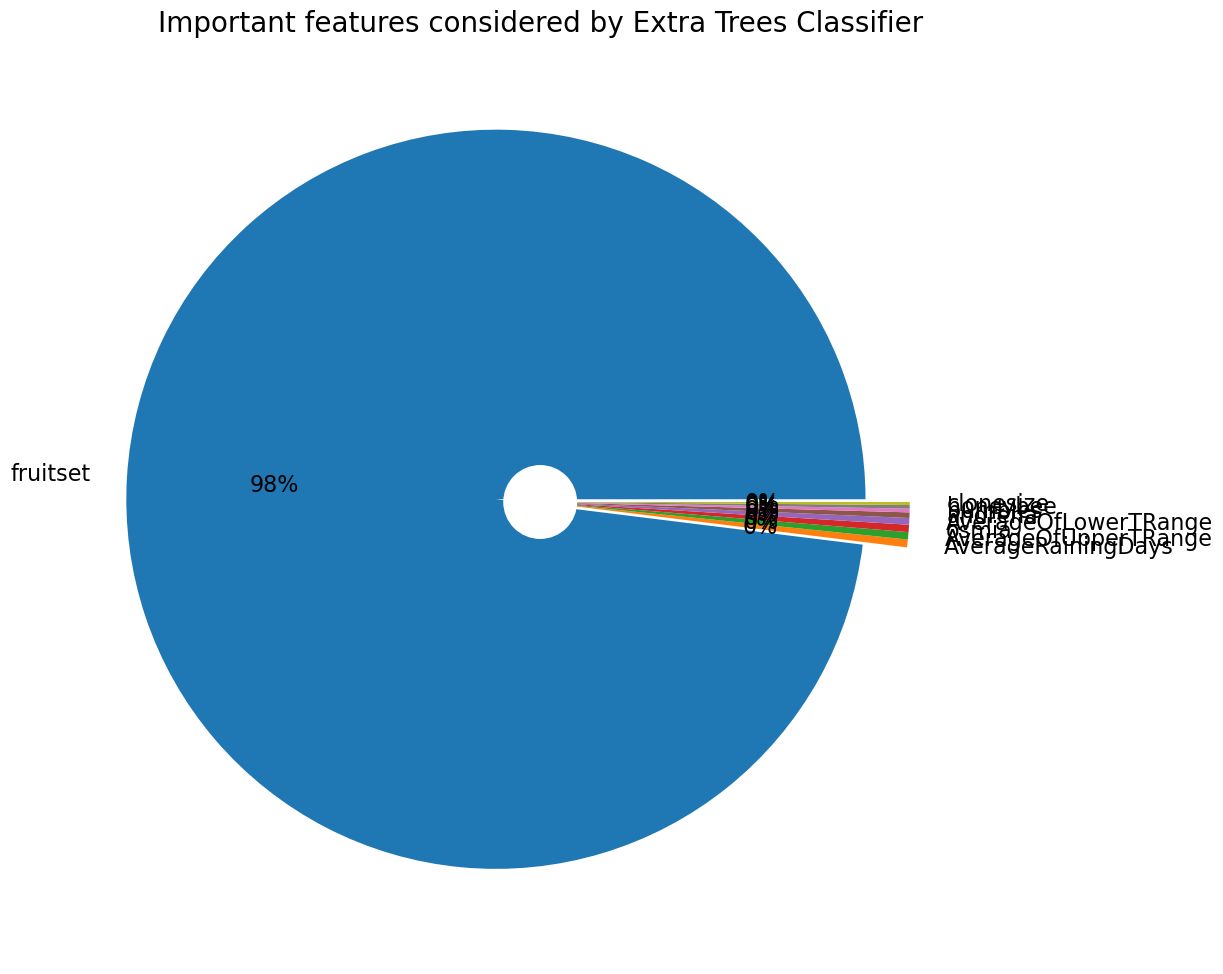

In [47]:
feat_importances = pd.Series(rf_tuned.feature_importances_, index=X.columns)
plt.figure(figsize=(12,12))
myexplode = [0.12,0,0,0,0,0,0,0,0]
plt.pie(feat_importances.nlargest(10),labels=feat_importances.nlargest(10).index, autopct='%.0f%%',explode= myexplode,
        textprops={'fontsize': 16})
centre_circle = plt.Circle((0,0),0.10,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Important features considered by Extra Trees Classifier',fontsize=20)
plt.show()

In [48]:
import pickle

In [49]:
pickle.dump(rf_tuned,open('yield.pkl','wb'))

In [50]:
pickled_model=pickle.load(open('yield.pkl','rb'))

In [51]:
type(pickled_model)

sklearn.ensemble._forest.RandomForestRegressor